## ML linear regression algorithm with gradient descent from scratch

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
df = pd.read_csv('ex1data1.txt', sep=",", names=('X1','Y'))

# Preview dataset
df.head()

,X1,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
len(df)

97

## Plot sample data

Text(0,0.5,'Y')

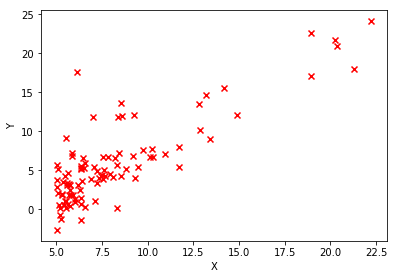

In [4]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.scatter(df['X1'], df['Y'], 
          color="red", marker='x')
axes.set_xlabel('X')
axes.set_ylabel('Y')

## Gradient Descent

A linear function takes on the form: h(x) = theta_0(x_0) + theta_1(x_1) + ... theta_n(x_n), where n = the number of features, theta_0 is the y-intercept, and x_0 = 1 (for ease of matrix multiplication)

Starting with the line:

h(x) = 0(x0) + 1(x1) (where theta0 = 0, theta1 = 1)

gradient descent will iteratively adjust the values of theta0 and theta1 until the cost function J([theta0,theta1]) is minimized. 

The cost function is:

J([theta0, theta1]) = 1/2(m) * SUM [  (np.tranpose([theta0, theta1])  *  [x0, x1]) - y1)^2  ]

Plotting J([theta0, theta1]) against theta0 and theta1 gives a bowl shaped parabaloid with a global minimum.  The global minimum is reached by simultaneously adjusting the values of theta_n's until J is minimized.  The instantaneous rate of change (slope and derivative) of the line tangent to each point in 3D space (theta_0, theta_1, J(t0,t1)) is used to update the values of theta_0 and theta_1 until J(t0, t1) has reached the global minimum.  Ex) If the slope is positive, then theta_0 and theta_1 will be updated to decrease in value in order to be directed towards the global minimum.  

In [7]:
# Find a way to make this iterable for any number of variables 

#Initialize theta(vec) at [0, 1]  
#Starting line is (y = 0 + 1x)  
#theta_0 = 0
#theta_1 = 1
#df
#alpha = 0.001, 0.003, 0.01, 0.03, 0.1, 0.3

# List outside function.  Save outputs into a list of 3D coordinates (t_0, t_1, J)
t0_t1_j_coords = [] 
def linreg_gradient_descent(theta_0, theta_1, df, alpha, cycles):
    # Prepare vectors to multiply (theta_vec * x_vec), which solves the linear equation h(x). 
    # list of x-feature vectors [[x0(1),x1(1)],[x0(2),x1(2)],...,[x0(97),x1(97)]], where x0=1
    m = len(df)
    y_list = []
    x_vec = []
    for i, x, y in df.itertuples():
        x_vec.append(np.array([1,x]).reshape(2,1))  
        y_list.append(y)
    
    # Perform gradient descent with input theta0, theta1
    theta_0_mean_diff = []
    theta_1_mean_diff = []
    mean_sq_diff_J = []
    theta_t = np.array([theta_0, theta_1]).reshape(1,2)
    i=0
    for vec in x_vec:
        # theta0 (mean error) * (coefficient x0)
        term_0 = (np.matmul(theta_t, vec)-y_list[i])*vec[0]
        theta_0_mean_diff.append(term_0)

        # theta1 (mean error) * (coefficient x1)
        term_1 = (np.matmul(theta_t, vec)-y_list[i])*vec[1]
        theta_1_mean_diff.append(term_1)

        # J(theta) (mean error squared)
        term_J = (np.matmul(theta_t, vec)-y_list[i])**2
        mean_sq_diff_J.append(term_J)

        i=i+1
    
    # Save initial thetas and resulting J into list of 3D coords (t_0, t_1, J)
    j_theta = (1/(2*m))*sum(mean_sq_diff_J)
    t0_t1_j_coords.append((np.around(float(theta_0), decimals=5), 
                        np.around(float(theta_1), decimals=5), 
                        np.around(float(j_theta), decimals=5)))
    
    
    # Update thetas:
    theta_0 = theta_0 - alpha*1/m*sum(theta_0_mean_diff)
    theta_1 = theta_1 - alpha*1/m*sum(theta_1_mean_diff)
    
    # Recursively iterate through updated thetas until # of specified entries is reached 
    
    ## THIS WILL CRASH THE ALGORITHM NO MATTER HOW ACCURATE YOUR STARTING PARAMETERS ARE
    #i = 1
    #if len(t0_t1_j_coords) == 1:
        #linreg_gradient_descent(theta_0, theta_1, df, alpha, cycles)      
    #elif t0_t1_j_coords[i][2] != t0_t1_j_coords[i-1][2]:
        #linreg_gradient_descent(theta_0, theta_1, df, alpha, cycles)
        #i = i + 1
    #else:
    
    if len(t0_t1_j_coords) < cycles:
        linreg_gradient_descent(theta_0, theta_1, df, alpha, cycles)
    else:
        t_0 = []
        t_1 = []
        j = []
        for coord in t0_t1_j_coords:
            t_0.append(coord[0])
            t_1.append(coord[1])                
            j.append(coord[2])
        
        # Summarize Results =========================================================
        cycles = len(t0_t1_j_coords)
        print(f'''Initialized with:
            theta_0 = {t0_t1_j_coords[0][0]}  
            theta_1 = {t0_t1_j_coords[0][1]} 
            alpha = {alpha}
            cycles =  {cycles}''')
        print(f'The minimum J after {cycles} cycles is: {min(j)}')
        print(f'The index of minimum J after {cycles} cycles is: {np.argmin(j)}')
        print(f'The minimum (t0, t1, j) coordinate is: {t0_t1_j_coords[np.argmin(j)]}')
        print(f'The line of best fit is: h(x) = {t0_t1_j_coords[np.argmin(j)][0]} + {t0_t1_j_coords[np.argmin(j)][1]}x')
        print('\n')
        
        # Plot the cost function J(t0, t1) =========================================
        print('Cost Function Plot')
        fig_j = plt.figure(figsize=(10,5))
        ax = fig_j.add_axes([0.8,0.8,1,1],projection='3d')
        p = ax.plot_trisurf(t_0, t_1, j,cmap=cm.coolwarm,linewidth=1)
        ax.set_xlabel("Theta_0")
        ax.set_ylabel("Theta_1")
        ax.set_zlabel("J")
        cb = fig_j.colorbar(p, shrink=1)
 
        # Create list of predicted Y values using the new hypothesis
        x_list = []
        predicted_y_list = []
        for i, x, y in df.itertuples():
            x_list.append(x)
        for x in x_list:
            predicted_y = t0_t1_j_coords[np.argmin(j)][0] + t0_t1_j_coords[np.argmin(j)][1]*x
            predicted_y_list.append(predicted_y)
        
        # Initialize the subplot
        fig, ((axes1), (axes2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
        fig.subplots_adjust(wspace=0.6)
        
        # Plot the (X, predicted_Y) with the new h(x) 
        axes1.scatter(df['X1'], df['Y'], 
                  color="red", marker='x')
        axes1.set_xlabel('X')
        axes1.set_ylabel('Y')
        axes1.set_title('Line of Best Fit')
        axes1.plot(x_list, predicted_y_list, color="blue", linewidth=1)
        
        # Plot Cost Function J(t0,t1) vs. Cycles 
        x_cycles = np.arange(0,cycles,1)
        axes2.set_xlabel('Cycles')
        axes2.set_ylabel('J')
        axes2.set_title('J(t0, t1) per Cycle')
        axes2.plot(x_cycles, j, color="blue", linewidth=1)
        

Initialized with:
            theta_0 = 0.0  
            theta_1 = 1.0 
            alpha = 0.02
            cycles =  1500
The minimum J after 1500 cycles is: 4.477
The index of minimum J after 1500 cycles is: 1470
The minimum (t0, t1, j) coordinate is: (-3.87661, 1.19111, 4.477)
The line of best fit is: h(x) = -3.87661 + 1.19111x


Cost Function Plot


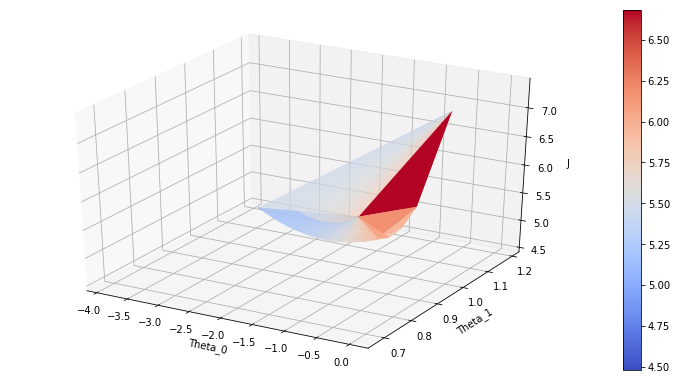

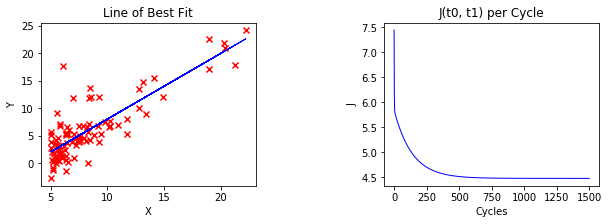

In [8]:
linreg_gradient_descent(theta_0=0,theta_1=1, df=df, alpha=0.02, cycles=1500) 

In [9]:
t0_t1_j_coords[0]

(0.0, 1.0, 7.44586)

### Re-Initialize with the new minimum theta_0 and theta_1
#### Have to reset t0_t1_j_coords

Initialized with:
            theta_0 = -3.87661  
            theta_1 = 1.19111 
            alpha = 0.02
            cycles =  1500
The minimum J after 1500 cycles is: 4.47697
The index of minimum J after 1500 cycles is: 308
The minimum (t0, t1, j) coordinate is: (-3.88948, 1.1924, 4.47697)
The line of best fit is: h(x) = -3.88948 + 1.1924x


Cost Function Plot


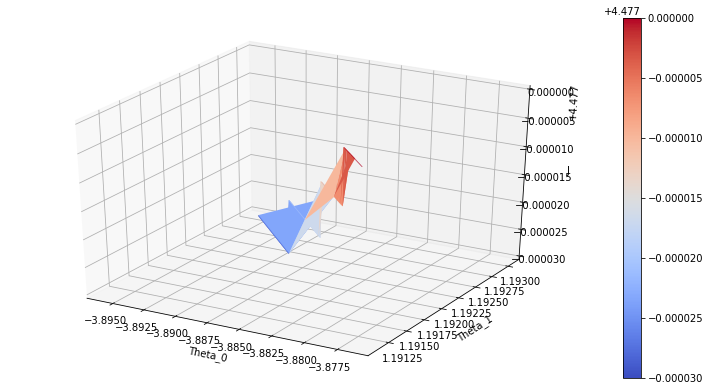

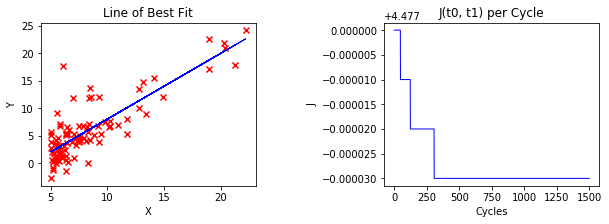

In [10]:
t0_t1_j_coords = [] 
linreg_gradient_descent(theta_0=-3.87661,theta_1=1.19111, df=df, alpha=0.02, cycles=1500) 

In [11]:
# See if/where J starts to increase again to see if the learning rate (alpha) overshot

for i in range(0, len(t0_t1_j_coords)-1): 
    if t0_t1_j_coords[i+1][2] > t0_t1_j_coords[i][2]: 
        print(f'Index of the inflection point: {i}')
        print(f'{t0_t1_j_coords[i]}, {t0_t1_j_coords[i+1]}')
    else:
        print('No inflection point')
        break

No inflection point


In [12]:
t0_t1_j_coords[308:320]

[(-3.88948, 1.1924, 4.47697),
 (-3.8895, 1.1924, 4.47697),
 (-3.88952, 1.19241, 4.47697),
 (-3.88955, 1.19241, 4.47697),
 (-3.88957, 1.19241, 4.47697),
 (-3.88959, 1.19241, 4.47697),
 (-3.88961, 1.19241, 4.47697),
 (-3.88964, 1.19242, 4.47697),
 (-3.88966, 1.19242, 4.47697),
 (-3.88968, 1.19242, 4.47697),
 (-3.8897, 1.19242, 4.47697),
 (-3.88972, 1.19243, 4.47697)]

 ## Normal Equation

In [13]:
x1_list = [x1 for i, x1, y in df.itertuples()]
x_vector = [[1, x1] for i, x1, y in df.itertuples()]
y_list = [y for i, x1, y in df.itertuples()]

x_array = np.array(x_vector).reshape(97, 2)
y_array = np.array(y_list).reshape(97, 1)

xt_x_inv = np.linalg.inv(np.matmul(np.transpose(x_array), x_array))
xt_y = np.matmul(np.transpose(x_array), y_array)
theta = np.matmul(xt_x_inv, xt_y)
theta

array([[-3.89578088],
       [ 1.19303364]])

In [14]:
predicted_y_list_normal = []
for i, x1, y in df.itertuples():
    predicted_y_normal = theta[0] + theta[1]*x1 
    predicted_y_list_normal.append(predicted_y_normal)
predicted_y_array_normal = np.array(predicted_y_list_normal).reshape(1,97)

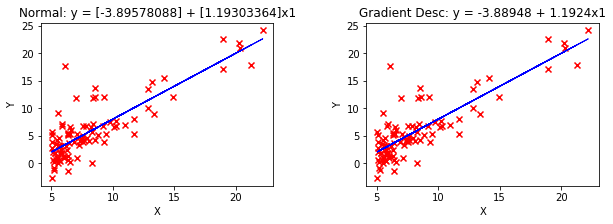

In [18]:
# Plot Normal Equation result:
# y = -3.89578088 + 1.19303364x compared to (h(x) = -3.88948 + 1.1924x)

# Initialize the subplot
fig, ((axes1), (axes2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
fig.subplots_adjust(wspace=0.4)
        
# Plot the Normal Equation 
axes1.scatter(df['X1'], df['Y'], color="red", marker='x')
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title(f'Normal: y = {theta[0]} + {theta[1]}x1')
axes1.plot(x1_list, predicted_y_list_normal, color="blue", linewidth=1)
        
# Plot the Gradient Descent Linear Regression Equation 
j = [coord[2] for coord in t0_t1_j_coords]
t0_t1 = [t0_t1_j_coords[np.argmin(j)][0], t0_t1_j_coords[np.argmin(j)][1]]
predicted_y_list_GD = []
for i, x1, y in df.itertuples():
    pred_y_GD = t0_t1[0] + t0_t1[1]*x1
    predicted_y_list_GD.append(pred_y_GD)
    
axes2.scatter(df['X1'], df['Y'], color="red", marker='x')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title(f'Gradient Desc: y = {t0_t1[0]} + {t0_t1[1]}x1')
axes2.plot(x1_list, predicted_y_list_GD, color="blue", linewidth=1)